In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1= pd.read_csv("Dataset_of_Diabetes.csv")

In [6]:
df= df1.copy()

In [8]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [10]:
df.isnull().sum()


ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [12]:
df['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [14]:
df1['CLASS']= df1['CLASS'].astype('category')

In [16]:
from sklearn.preprocessing import LabelEncoder

In [18]:
df['Gender']= df['Gender'].astype('category')

In [20]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [22]:
# Strip whitespace first, THEN apply the map
df['CLASS'] = df['CLASS'].astype(str).str.strip()  # Step 1: remove spaces
    # Step 2: apply mapping


class_mapping={
    'N': 'Non-Diabetic',
    'P':'Pre-Diabetic',
    'Y':'Diabetic'
}
df['CLASS'] = df['CLASS'].map(class_mapping)   

In [24]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Non-Diabetic
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Non-Diabetic


In [26]:
df['CLASS'].value_counts()

CLASS
Diabetic        844
Non-Diabetic    103
Pre-Diabetic     53
Name: count, dtype: int64

In [30]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['CLASS'] = label_encoder.fit_transform(df['CLASS'])

In [34]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1


In [42]:
df=df.drop(['ID', 'No_Pation'], axis=1)

In [44]:
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,0
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,0
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,0
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,0


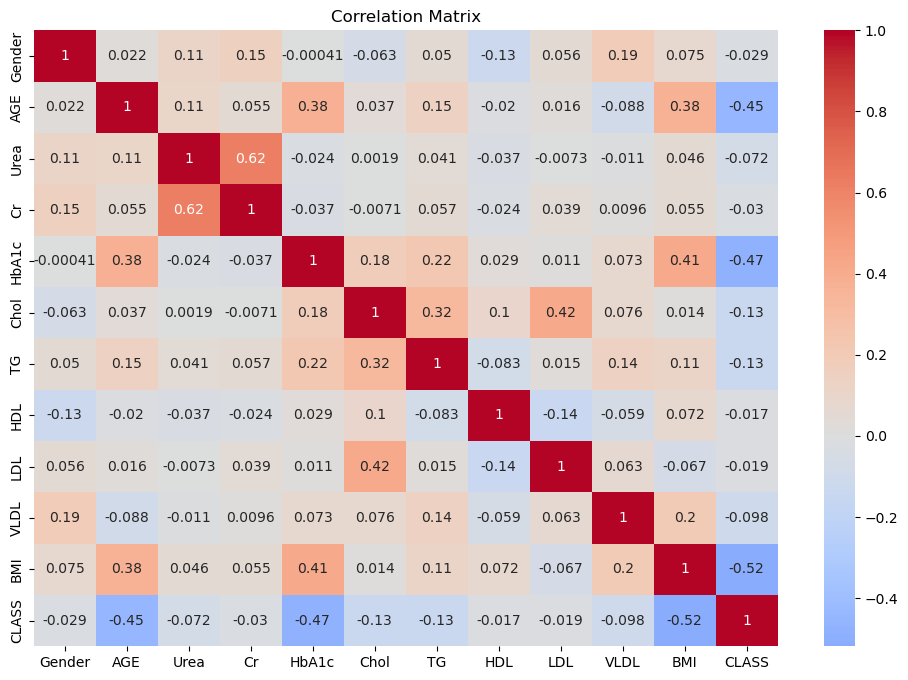

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2122081499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CLASS', data=df, palette='pastel')


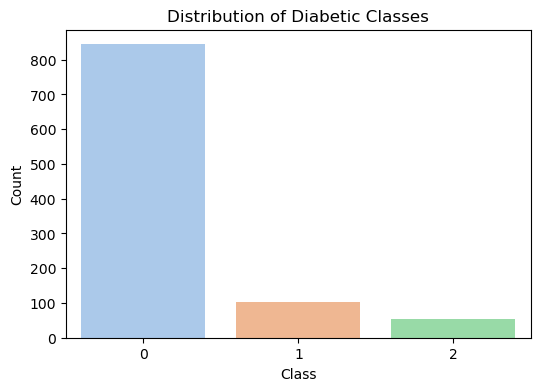

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='CLASS', data=df, palette='pastel')
plt.title('Distribution of Diabetic Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2920576381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')


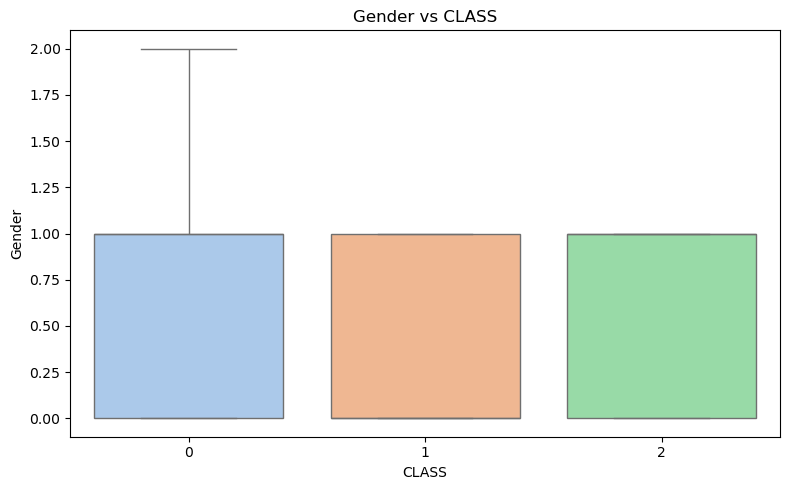

/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2920576381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')


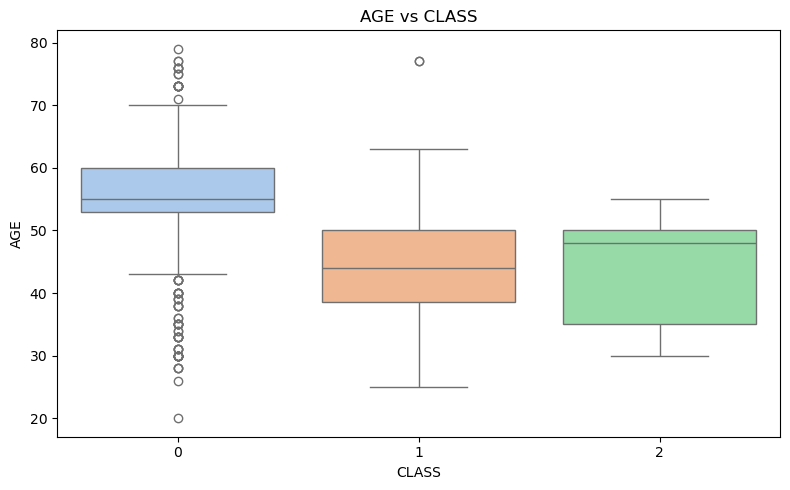

/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2920576381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')


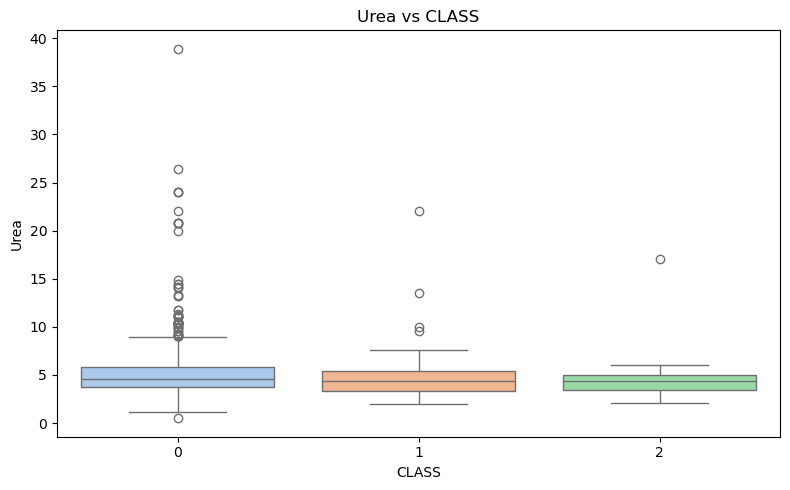

/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2920576381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')


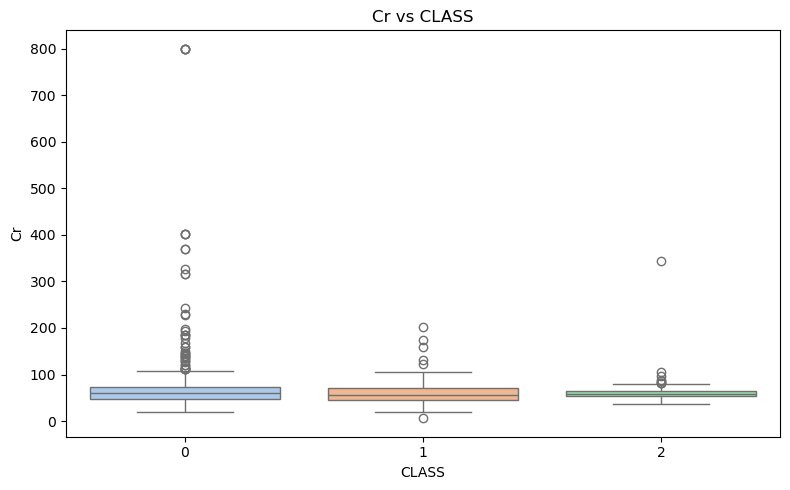

/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2920576381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')


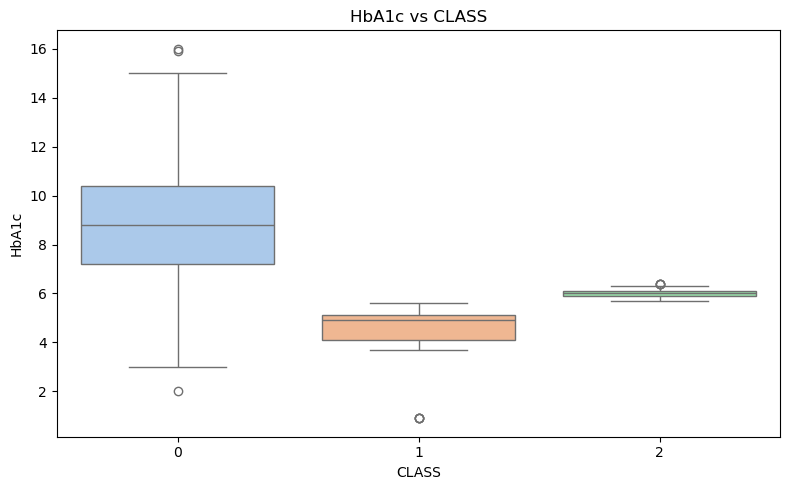

/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2920576381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')


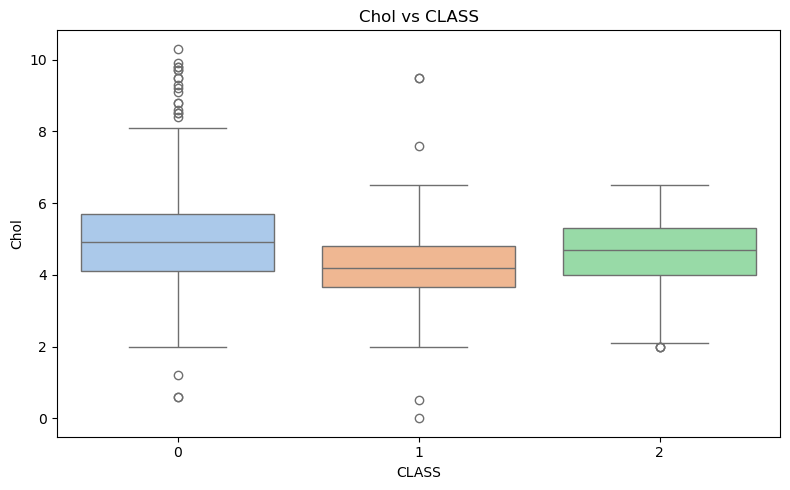

/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2920576381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')


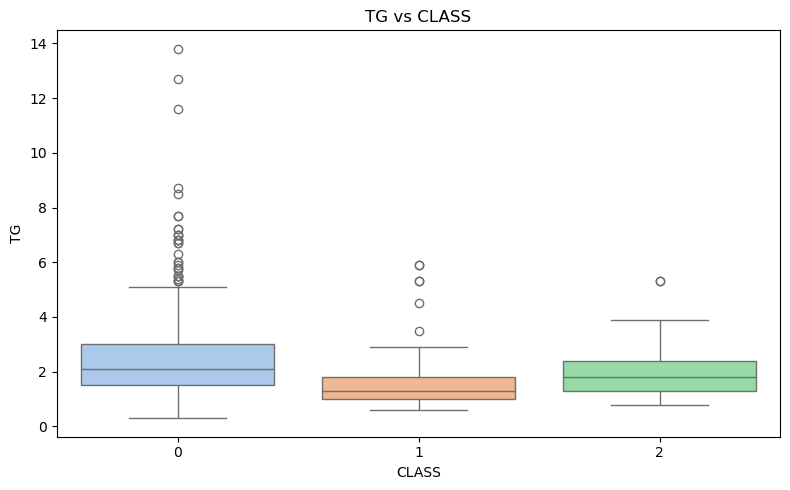

/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2920576381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')


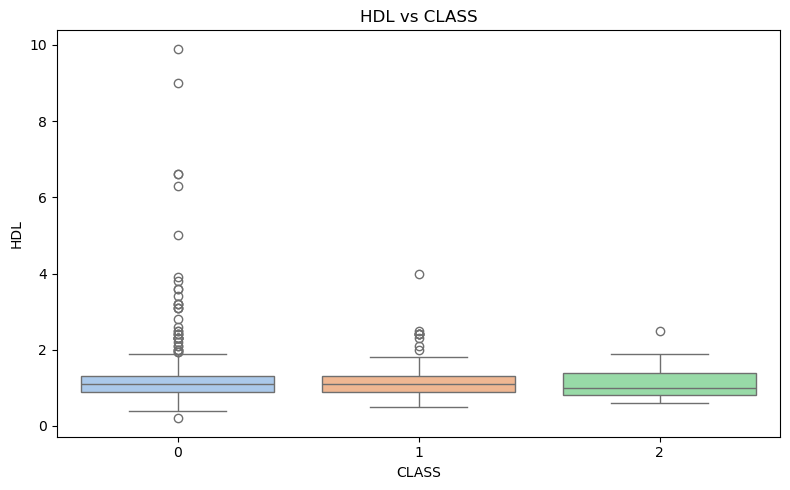

/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2920576381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')


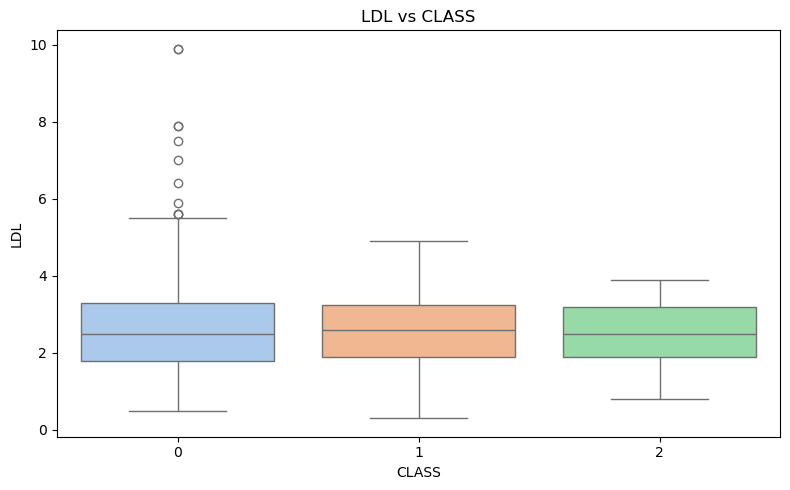

/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2920576381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')


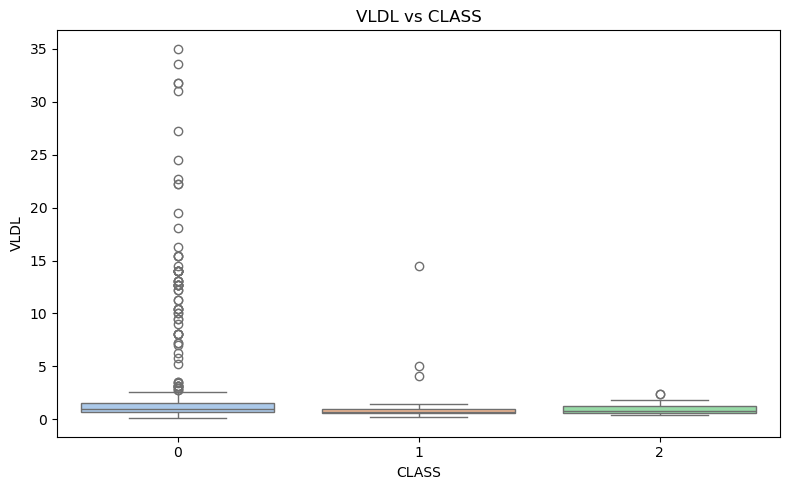

/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2920576381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')


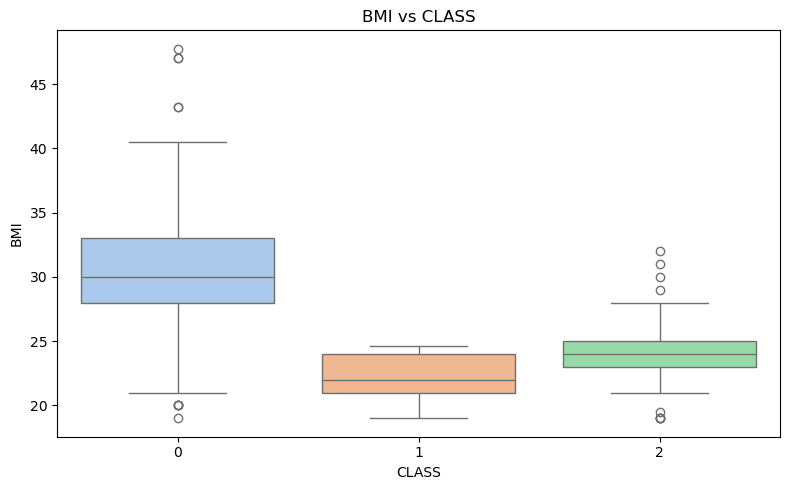

/var/folders/gq/790zwm9x4gn7xgt7hf5kbhpc0000gn/T/ipykernel_22592/2920576381.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')


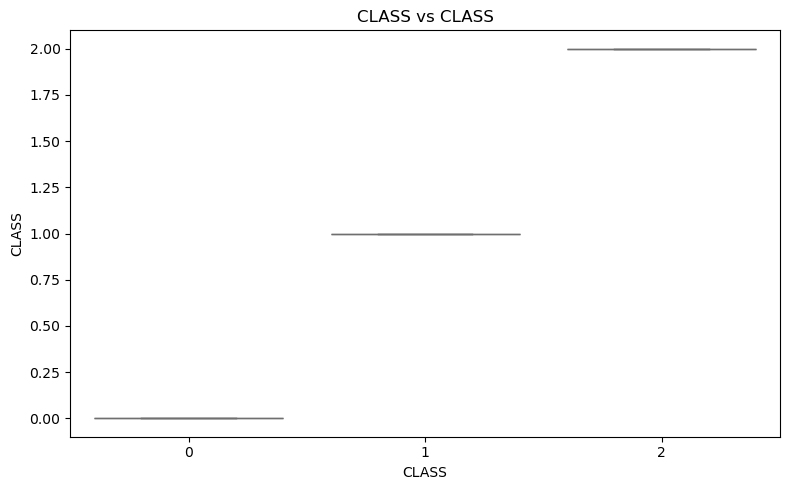

In [56]:
numerical_cols = df.select_dtypes(include='number').columns

numerical_cols = [col for col in numerical_cols if col not in ['ID', 'No_Pation']]

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='CLASS', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs CLASS')
    plt.xlabel('CLASS')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree

In [62]:
X = df.drop(columns= ['CLASS', 'Gender'])  
X = X.select_dtypes(include='number') 
y= df['CLASS']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       173
           1       0.95      0.90      0.93        21
           2       0.86      1.00      0.92         6

    accuracy                           0.98       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.98      0.98      0.98       200

Accuracy: 0.98


In [70]:
print(df.dtypes)


Gender      int64
AGE         int64
Urea      float64
Cr          int64
HbA1c     float64
Chol      float64
TG        float64
HDL       float64
LDL       float64
VLDL      float64
BMI       float64
CLASS       int64
dtype: object


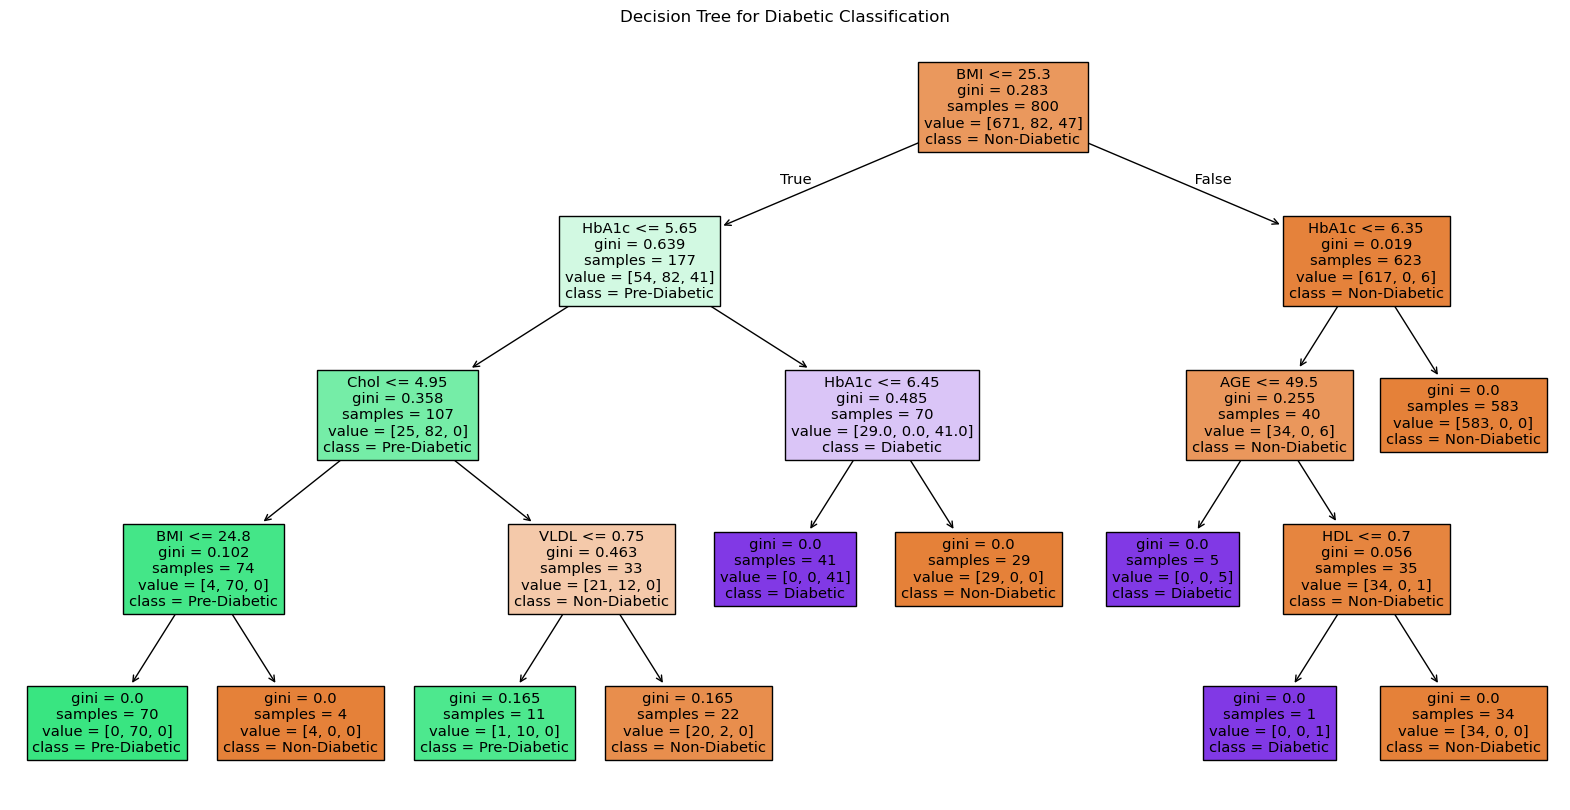

In [72]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Non-Diabetic','Pre-Diabetic', 'Diabetic'] , filled=True)
plt.title("Decision Tree for Diabetic Classification")
plt.show()
